In [68]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook
nx = 101
xmax = 250.0 # micrometers
x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print 'dx =', dx

D_SI_300 = 24.0e-6 # m^2/s
D_300 = D_SI_300 * 1e6  # um^2/us
Temp = 260.0
Pressure = .2
alpha = 2.072
D = D_300*(Temp/300)**alpha/(Pressure/1.0); print D_300, D

# initialize unow and u as zero matrices 
u0 = np.zeros(nx) # old u values 
un = np.zeros(nx) # new u values

dx2 = dx**2


dx = 2.5
24.0 89.2094338602


In [69]:
udirichletL = 1.0
udirichletR = 0.5
dt = dx2/D/4; print 'dt', dt
gneumann_nu_kin = D/(xmax*dx); print 'gneumann_kin', gneumann_nu_kin 
gneumann_nu_kin = D/((nx-1)*dx**2); print 'gneumann_kin', gneumann_nu_kin 
nu_kin_ml = 0.1633333333
kfactor = gneumann_nu_kin/nu_kin_ml; print 'kfactor', kfactor
gneumann = kfactor * nu_kin_ml * .25
gneumanneff = gneumann*dt; print 'gneumann_eff', gneumanneff
Dxeff = D*dt/dx2


dt 0.0175149637475
gneumann_kin 0.142735094176
gneumann_kin 0.142735094176
kfactor 0.87388833187
gneumann_eff 0.000625


In [70]:


def propagate(u0):
    un[1:-1] = u0[1:-1] + ( \
    (u0[2:] - 2*u0[1:-1] + u0[:-2])*Dxeff)

    # Dirichlet on the left boundary
    un[0] = udirichletL
    
    # Neumann on the right boundary
    un[-1] = u0[-1] +(u0[-2] - u0[-1])*Dxeff -gneumanneff
    
    return un


def propagateD(u0):
    un[1:-1] = u0[1:-1] + ( \
    (u0[2:] - 2*u0[1:-1] + u0[:-2])*Dxeff)

    # Dirichlet on the left boundary
    un[0] = udirichletL
    
    # Dirichlet on the right boundary
    un[-1] = udirichletR
    
    return un


<IPython.core.display.Javascript object>


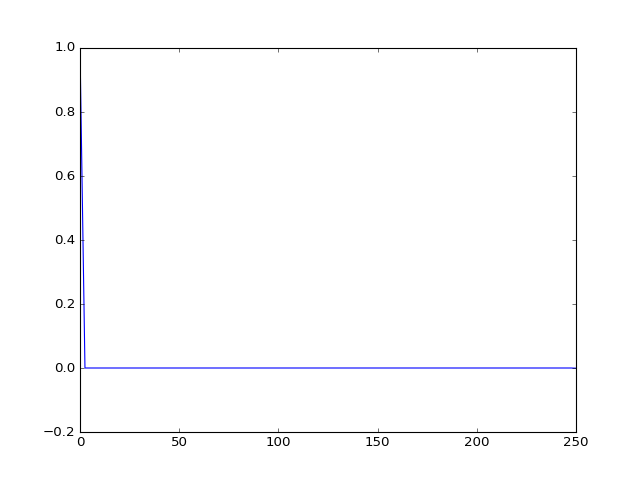

In [71]:
un = propagate(u0)
plt.figure()
plt.plot(x,un)

<IPython.core.display.Javascript object>


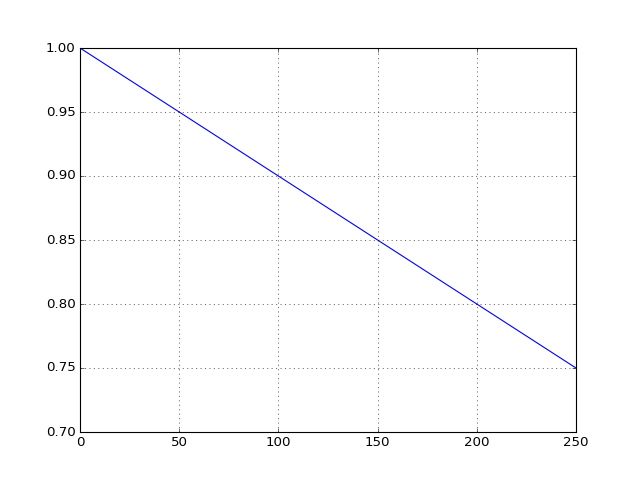

In [72]:
for i in range(200000):
    un = propagate(un)
plt.figure()
plt.plot(x,un)
plt.grid('on')